# predicting turbine energy yield (TEY) using ambient variables as features.


In [29]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#load data
data= pd.read_csv("gas_turbines.csv")

In [32]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA & Data preprocessing


In [33]:
data.shape


(15039, 11)

In [34]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [35]:
# Changing position of target column 'TEY'
Target = data['TEY']
#Drop the existing column
data.drop(labels=['TEY'], axis=1,inplace = True)
data.insert(0, 'Y', Target)

data = data.rename({'Y':'TEY'}, axis = 1)

data.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [36]:
#no nul values, clean data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [37]:
data.describe()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,15039.000000,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934
std,15.829717,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586
min,100.170000,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000
25%,127.985000,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500
50%,133.780000,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000
75%,140.895000,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500
max,174.610000,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000


In [38]:
data.isna().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [39]:
# Checking correlation between variables
data.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


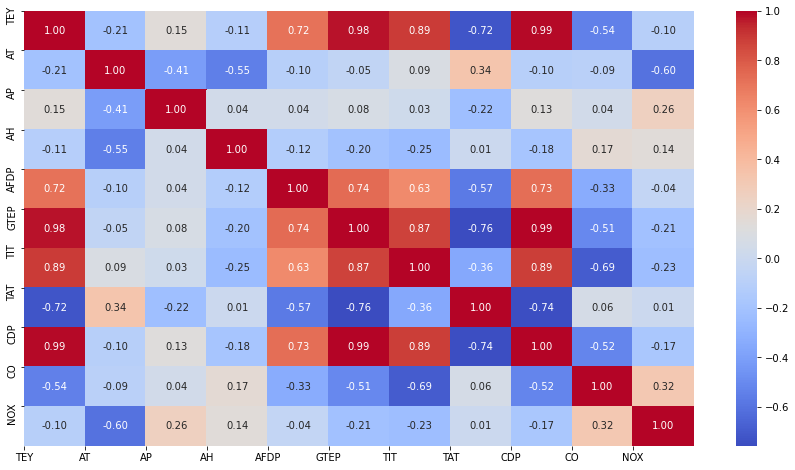

In [40]:
# Heatmap of correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

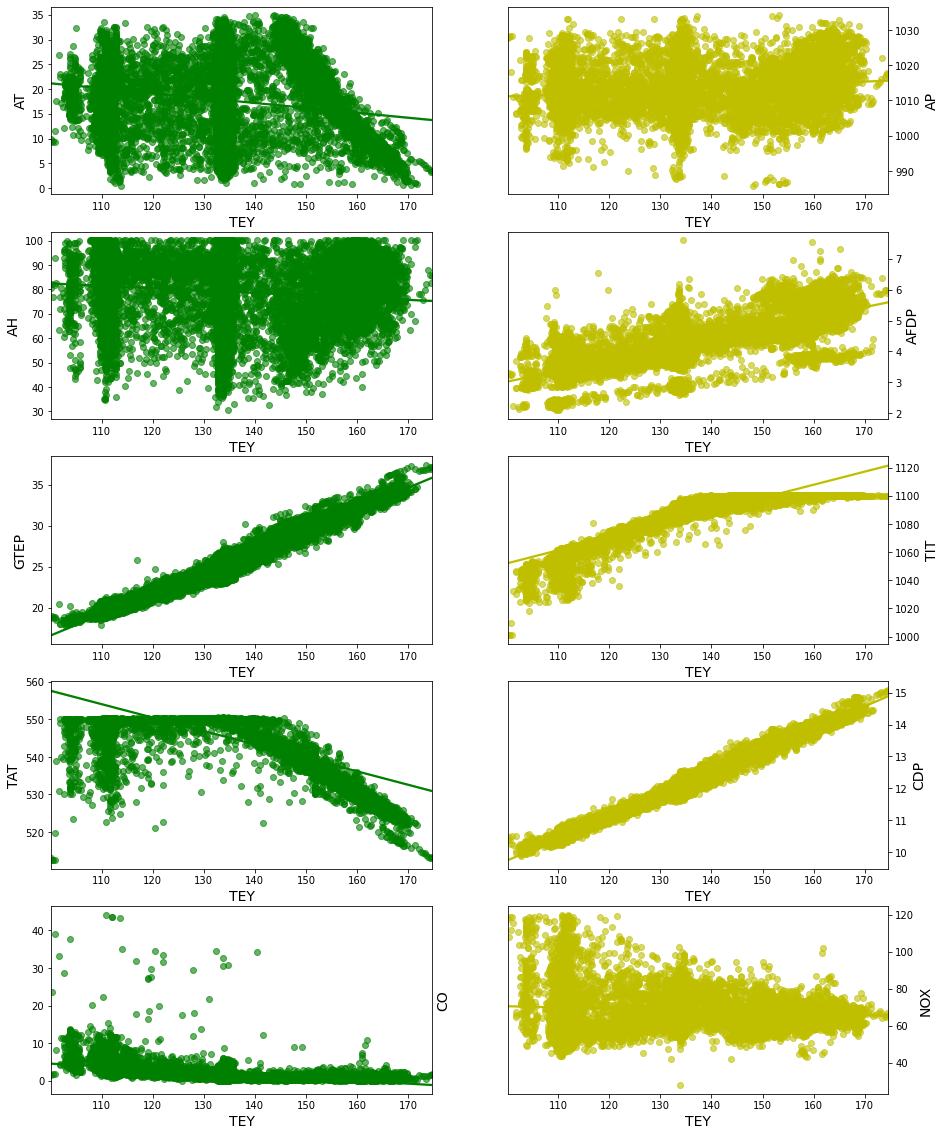

In [41]:
# plot regplots  
f, axes = plt.subplots(5,2, figsize=(15,20))

sns.regplot(x = 'TEY', y = 'AT', data = data, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('TEY', fontsize = 14)
axes[0,0].set_ylabel('AT', fontsize=14)
axes[0,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AP', data = data, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('TEY', fontsize = 14)
axes[0,1].set_ylabel('AP', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'AH', data = data, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('TEY', fontsize = 14)
axes[1,0].set_ylabel('AH', fontsize=14)
axes[1,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AFDP', data = data, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('TEY', fontsize = 14)
axes[1,1].set_ylabel('AFDP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'GTEP', data = data, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('TEY', fontsize = 14)
axes[2,0].set_ylabel('GTEP', fontsize=14)
axes[2,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'TIT', data = data, ax = axes[2,1], color = 'y',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('TEY', fontsize = 14)
axes[2,1].set_ylabel('TIT', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'TAT', data = data, ax = axes[3,0], color = 'g',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('TEY', fontsize = 14)
axes[3,0].set_ylabel('TAT', fontsize=14)
axes[3,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'CDP', data = data, ax = axes[3,1], color = 'y',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('TEY', fontsize = 14)
axes[3,1].set_ylabel('CDP', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()

sns.regplot(x = 'TEY', y = 'CO', data = data, ax = axes[4,0], color = 'g',scatter_kws={'alpha':0.6})
axes[4,0].set_xlabel('TEY', fontsize = 14)
axes[4,0].set_ylabel('CO', fontsize=14)
axes[4,0].yaxis.set_label_position("right")
axes[4,0].yaxis.tick_left()

sns.regplot(x = 'TEY', y = 'NOX', data = data, ax = axes[4,1], color = 'y',scatter_kws={'alpha':0.6})
axes[4,1].set_xlabel('TEY', fontsize = 14)
axes[4,1].set_ylabel('NOX', fontsize=14)
axes[4,1].yaxis.set_label_position("right")
axes[4,1].yaxis.tick_right()

plt.show()

In [42]:
data1= data.drop(['AT','AP','AH','CO','NOX'], axis = 1)
data1 

,TEY,AFDP,GTEP,TIT,TAT,CDP
0,114.70,3.5000,19.663,1059.2,550.00,10.605
1,114.72,3.4998,19.728,1059.3,550.00,10.598
2,114.71,3.4824,19.779,1059.4,549.87,10.601
3,114.72,3.4805,19.792,1059.6,549.99,10.606
4,114.72,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...,...
15034,111.61,3.5421,19.164,1049.7,546.21,10.400
15035,111.78,3.5059,19.414,1046.3,543.22,10.433
15036,110.19,3.4770,19.530,1037.7,537.32,10.483
15037,110.74,3.4486,19.377,1043.2,541.24,10.533


In [43]:
#normalizing the data
array1= data1.values

In [44]:
array1

array([[ 114.7   ,    3.5   ,   19.663 , 1059.2   ,  550.    ,   10.605 ],
       [ 114.72  ,    3.4998,   19.728 , 1059.3   ,  550.    ,   10.598 ],
       [ 114.71  ,    3.4824,   19.779 , 1059.4   ,  549.87  ,   10.601 ],
       ...,
       [ 110.19  ,    3.477 ,   19.53  , 1037.7   ,  537.32  ,   10.483 ],
       [ 110.74  ,    3.4486,   19.377 , 1043.2   ,  541.24  ,   10.533 ],
       [ 111.58  ,    3.4275,   19.306 , 1049.9   ,  545.85  ,   10.583 ]])

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler().fit(array1)
rescaledX = scaler.transform(array1)
rescaledX

array([[-1.23117246, -0.92123188, -1.37910125, -1.48837592,  0.58524028,
        -1.35733078],
       [-1.22990897, -0.92149498, -1.36352783, -1.4823253 ,  0.58524028,
        -1.36367619],
       [-1.23054071, -0.94438456, -1.35130868, -1.47627469,  0.56871459,
        -1.36095673],
       ...,
       [-1.5160891 , -0.95148822, -1.41096688, -2.78925732, -1.02664984,
        -1.46792219],
       [-1.48134317, -0.98884822, -1.44762432, -2.4564737 , -0.52833681,
        -1.42259784],
       [-1.42827666, -1.01660512, -1.46463529, -2.05108275,  0.05768949,
        -1.37727349]])

In [47]:
data2=pd.DataFrame(rescaledX, columns=['TEY','AFDP','GTEP','TIT','TAT','CDP'] )
data2

,TEY,AFDP,GTEP,TIT,TAT,CDP
0,-1.231172,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-1.229909,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-1.230541,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-1.229909,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-1.229909,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...,...
15034,-1.426381,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-1.415642,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-1.516089,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-1.481343,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


In [48]:
y = data2['TEY']
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [49]:
X= data2.drop('TEY', axis=1)
X

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


In [68]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [69]:
n_features =X.shape[1]
n_features

5

In [70]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=n_features, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    #here we take loss func as means_squared_error coz its regression classifier
    optmizer =RMSprop(0.03)#Learning_rate is 0.03
    model.compile(loss='mean_squared_error', optimizer=optmizer, metrics=['accuracy'])
    return model

In [71]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

<ipython-input-71-435ad295a585>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=  19.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=  18.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=  17.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=  18.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=  16.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

In [72]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 50}
0.0,0.0 with: {'batch_size': 10, 'epochs': 100}
0.0,0.0 with: {'batch_size': 20, 'epochs': 10}
0.0,0.0 with: {'batch_size': 20, 'epochs': 50}
0.0,0.0 with: {'batch_size': 20, 'epochs': 100}
0.0,0.0 with: {'batch_size': 40, 'epochs': 10}
0.0,0.0 with: {'batch_size': 40, 'epochs': 50}
0.0,0.0 with: {'batch_size': 40, 'epochs': 100}


In [ ]:
#best batch size =10  and best epoch = 10

In [73]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = n_features,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = n_features,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss='mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model


In [74]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

<ipython-input-74-f5b33f965c82>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)
/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  19.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  20.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  17.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  17.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  18.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  18.5s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  17.7s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  16.5s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  18.2s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  18.0s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  18.9s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  17.7s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  19.0s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  17.9s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  18.0s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  17.4s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  17.4s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  18.7s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  18.1s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  17.7s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  19.2s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  19.0s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  17.3s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  18.6s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  18.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  16.9s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  18.2s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  18.9s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  18.4s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  16.9s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  17.9s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  18.4s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  18.5s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  17.7s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  19.3s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  17.5s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  19.4s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  17.7s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  18.6s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  18.7s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  17.4s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  18.2s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  17.9s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  17.5s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  17.9s


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [75]:
 # Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [76]:
def create_model(neuron1,neuron2):#to determine the no for hidden layers neuron
    model = Sequential()
    model.add(Dense(neuron1,input_dim = n_features,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    optmizer =RMSprop(0.001) 
    model.compile(loss='binary_crossentropy', optimizer=optmizer, metrics=['accuracy'])
    return model

In [77]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)
# Define the grid search parameters
neuron1 = [4,8,16,20,30,40,50]
neuron2 = [2,4,8,20,30,40,50,60]
# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

<ipython-input-77-6a298a04f66b>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)


Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 1/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  20.1s
[CV 2/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 2/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  20.5s
[CV 3/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 3/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  21.2s
[CV 4/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 4/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  19.5s
[CV 5/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 5/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  18.9s
[CV 1/5; 2/56] START neuron1=4, neuron2=4.......................................
[CV 1/5; 2/56] END .....................neuron1

In [78]:
#Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 40}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 50}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 60}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 40}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 50}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 60}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 16, 'ne

In [ ]:
#we get best learning rate as 0.001 and dropout rate as 0 and best neurons as 4 and 2, so now we can build final model

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)

In [81]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 5), (4512, 5), (10527,), (4512,))

In [83]:
import keras
optmizer =RMSprop(0.001)
model_new=keras.Sequential([
    keras.layers.Dense(4,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(2,activation ='relu')
])
model_new.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [85]:
import tensorflow
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model_new.fit(X_train, y_train, epochs=10, batch_size=10, verbose = 1)

Epoch 1/10
1053/1053 [==============================] - 3s 3ms/step - loss: 0.7579 - accuracy: 0.0000e+00: 0s - loss: 0.7640 -  - ETA: 0s - loss: 0.7572 - accura
Epoch 2/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.7375 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.7373 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.7373 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.7372 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.7372 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.7372 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.7371 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.7371 - accuracy: 0

In [86]:
model_new.evaluate(X_test,y_test)

141/141 [==============================] - 0s 2ms/step - loss: 0.7518 - accuracy: 0.0000e+00


[0.7518478035926819, 0.0]